In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the edges
edges = pd.read_csv('data/edgelist.txt', sep=',')
edges.columns = ['source', 'target']

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges.values)


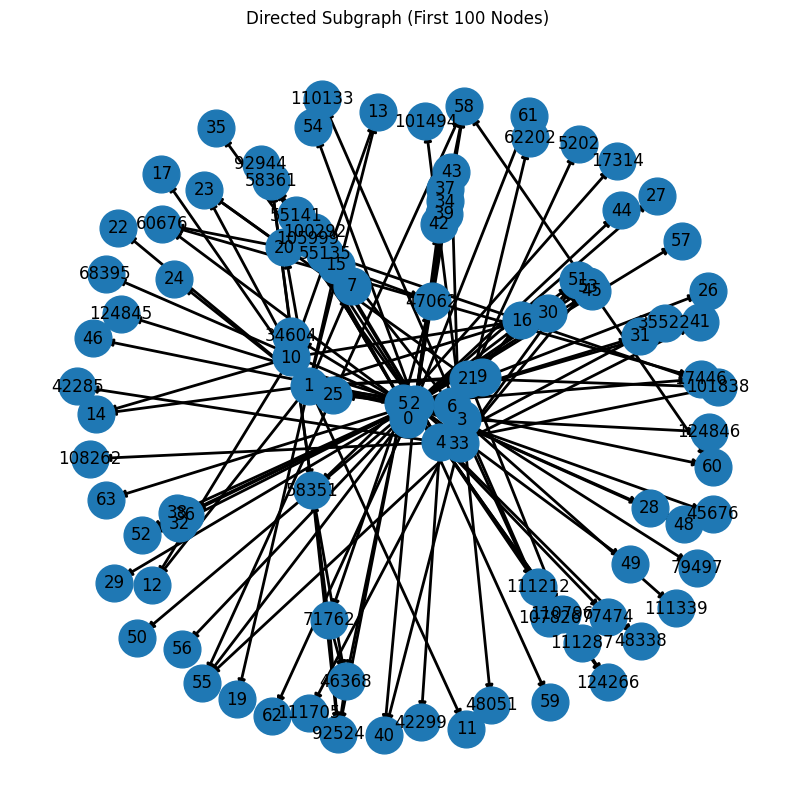

In [3]:

# Draw the graph
# Create a subgraph with the first 100 nodes
subgraph_nodes = list(G.nodes)[:100]
subgraph = G.subgraph(subgraph_nodes)

# Draw the subgraph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, seed=42)  # positions for all nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=700)
nx.draw_networkx_edges(subgraph, pos, width=2)
nx.draw_networkx_labels(subgraph, pos, font_size=12)
plt.title('Directed Subgraph (First 100 Nodes)')
plt.axis('off')  # Turn off the axis
plt.show()


In [4]:
#find chains of length 2
#chain means a dirrects to b and b directs to c
chains = []
for node in G.nodes:
    successors = list(G.successors(node))
    for i in range(len(successors)):
        for j in range(i + 1, len(successors)):
            chains.append((node, successors[i], successors[j]))
# Print the chains
print(len(chains))
    


74585418


In [5]:
print(chains[:10])

[(2, 25, 26), (2, 25, 27), (2, 25, 28), (2, 25, 29), (2, 25, 30), (2, 25, 31), (2, 25, 32), (2, 25, 33), (2, 25, 34), (2, 25, 35)]


In [7]:
#convert to dataframe
chains_df = pd.DataFrame(chains, columns=['a', 'b', 'c'])


In [9]:
chains_df.head()

,a,b,c
0,2,25,26
1,2,25,27
2,2,25,28
3,2,25,29
4,2,25,30


In [ ]:
negative_from_chains = pd.DataFrame(chains['c'],chains['a'])


In [6]:
#check if graph is connected
connected = nx.is_connected(G.to_undirected())
print(f"Is the graph connected? {connected}")

#print the number of connected components
connected_components = list(nx.connected_components(G.to_undirected()))
print(f"Number of connected components: {len(connected_components)}")


                


Is the graph connected? False
Number of connected components: 57


In [11]:
#create 100000 pairs of nodes from different components
pairs = []
for i in range(500000):
    #choose two random components
    comp1 = connected_components[i % len(connected_components)]
    comp2 = connected_components[(i + 1) % len(connected_components)]
    
    #choose a random node from each component
    node1 = list(comp1)[0]
    node2 = list(comp2)[0]
    
    pairs.append((node1, node2))
# Print the first 10 pairs
print(pairs[:10])


[(0, 122995), (122995, 137340), (137340, 116496), (116496, 79843), (79843, 132438), (132438, 131605), (131605, 116970), (116970, 125264), (125264, 132352), (132352, 87442)]


In [12]:
#convert to df with columns source and target
pairs_df = pd.DataFrame(pairs, columns=['source', 'target'])
pairs_df.to_csv('data/training/negative/negative_chains_sample.csv', index=False)
